In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.seterr(divide = 'ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
df_train = pd.read_csv(r'E:\Downloads\csv\titanic\train.csv')
df_test = pd.read_csv(r'E:\Downloads\csv\titanic\test.csv')

In [52]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [157]:
def cross_entropy(Y, T) :
    E = 0
    for i in range(len(Y)) :
        if T[i] == 1 :
            E -= np.log(Y[i])
        else :
            E -= np.log(1 - Y[i])
    return E

def cross_entropy_mean(Y, T) :
    return -np.mean(T.dot(np.log(Y)) + (1 - T).dot(np.log(1 - Y)))
    
def classification_rate(Y, T) :
    return (Y == T).mean()

def forward(w, X, b) :
    return sigmoid(X.dot(w) + b)

def sigmoid(z) :
    return 1/ (1 + np.exp(-z))

In [172]:
df_train_without_na = df_train.copy()
df_train_without_na = df_train_without_na.dropna(subset=('Age','Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'))

T = df_train_without_na.loc[:, 'Survived'].values.astype(np.float64)

X = df_train_without_na.iloc[:, [2, 4, 5, 6, 7, 11]]
X = pd.concat((pd.get_dummies(X.loc[:, ['Embarked']]), X), axis = 1)
X = X.drop(['Embarked'], axis = 1)
X.Sex.replace('male', 0, inplace=True)
X.Sex.replace('female', 1, inplace=True)
X['Age'] = X['Age'] / X['Age'].max()
temp = X.copy()
X = X.values.astype(np.float64)

In [173]:
X

array([[0.    , 0.    , 1.    , ..., 0.275 , 1.    , 0.    ],
       [1.    , 0.    , 0.    , ..., 0.475 , 1.    , 0.    ],
       [0.    , 0.    , 1.    , ..., 0.325 , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 1.    , ..., 0.2375, 0.    , 0.    ],
       [1.    , 0.    , 0.    , ..., 0.325 , 0.    , 0.    ],
       [0.    , 1.    , 0.    , ..., 0.4   , 0.    , 0.    ]])

483.6896568027944
326.39837032406393
322.61120908098707
320.52406823656855
319.1810276002851
318.2907879984181
317.6900046490803
317.27959445455735
316.99681104911235
316.8007337024445
Final w  [ 0.90481094 -0.02555192  0.45476389 -1.17193012  2.62707538 -2.98264056
 -0.32745797 -0.04157122]
Final classification rate  0.797752808988764


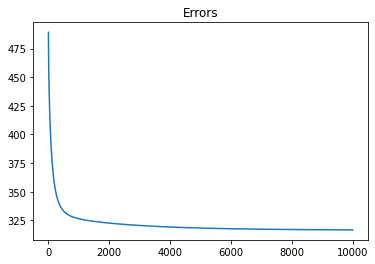

In [174]:
b = 0 #bias term
epochs = 10000
l1 = 0.001
learning_rate = 0.0001

#random initalization of weights
w = np.random.randn(X.shape[1]) / np.sqrt(X.shape[1])

errors = []
Y = forward(w, X, b)
error = cross_entropy(Y, T) + l1 * np.abs(w).mean()
errors.append(error)


for i in range(epochs) :
    w -= learning_rate * (X.T.dot(Y - T) + l1 * np.sign(w))
    b -= learning_rate * ((Y - T).sum())
    
    Y = forward(w, X, b)
    error = cross_entropy(Y, T) + (l1 * np.abs(w).mean())
    if i % 1000 == 0 :
        print(error)
    errors.append(error)
    
plt.title('Errors')
plt.plot(errors)

print('Final w ',w)
print('Final classification rate ', classification_rate(T, Y.round()))

In [171]:
temp.Age = temp.Age / temp.Age.max()
temp

,Embarked_C,Embarked_Q,Embarked_S,Pclass,Sex,Age,SibSp,Parch
0,0,0,1,3,0,0.2750,1,0
1,1,0,0,1,1,0.4750,1,0
2,0,0,1,3,1,0.3250,0,0
3,0,0,1,1,1,0.4375,1,0
4,0,0,1,3,0,0.4375,0,0
...,...,...,...,...,...,...,...,...
885,0,1,0,3,1,0.4875,0,5
886,0,0,1,2,0,0.3375,0,0
887,0,0,1,1,1,0.2375,0,0
889,1,0,0,1,0,0.3250,0,0


In [ ]:
yhat = []